<h1 align='center'>과제3 - 평점 그래프 그리기</h1>

<h3 align='end'> 201700255 강민정 </h3>


- 2020년 4월 31일 부터 50일간의 영화 평점 그래프
- 2010년 1월 1일 부터 2020년 9월 31일까지 매달 말일날의 영화 평점 그래프

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# tqdm 모듈 : 진행 상황을 바 형태로 표현해줌
from tqdm.notebook import tqdm

days = 50

date_list = pd.date_range('2020-04-01',periods=days,freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'})
    points = soup.find_all('td',{'class':'point'})
    
    titles_text = []
    points_text = []
    date = []
    
    for t,p in zip(titles,points):   # 길이가 같아 zip으로 한번에 처리 가능
        titles_text.append(t.text.strip('\n'))
        points_text.append(float(p.text))
        date.append(today)
        
    
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

print(len(movie_point))


2500


In [2]:
frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})
frame

,date,title,point
0,2020-04-01,그린 북,9.60
1,2020-04-01,가버나움,9.58
2,2020-04-01,베일리 어게인,9.52
3,2020-04-01,주전장,9.51
4,2020-04-01,포드 V 페라리,9.50
...,...,...,...
2495,2020-05-20,클레멘타인,9.35
2496,2020-05-20,모노노케 히메,9.35
2497,2020-05-20,쉰들러 리스트,9.35
2498,2020-05-20,달링,9.35


In [3]:
expr = "title == '어벤져스: 엔드게임'"
search_movie = frame.query(expr)
print(search_movie)

           date       title  point
27   2020-04-01  어벤져스: 엔드게임   9.38
77   2020-04-02  어벤져스: 엔드게임   9.38
127  2020-04-03  어벤져스: 엔드게임   9.38
177  2020-04-04  어벤져스: 엔드게임   9.38
227  2020-04-05  어벤져스: 엔드게임   9.38
277  2020-04-06  어벤져스: 엔드게임   9.38
328  2020-04-07  어벤져스: 엔드게임   9.38
378  2020-04-08  어벤져스: 엔드게임   9.38
428  2020-04-09  어벤져스: 엔드게임   9.38
478  2020-04-10  어벤져스: 엔드게임   9.38
528  2020-04-11  어벤져스: 엔드게임   9.38
578  2020-04-12  어벤져스: 엔드게임   9.38
628  2020-04-13  어벤져스: 엔드게임   9.38
678  2020-04-14  어벤져스: 엔드게임   9.38
728  2020-04-15  어벤져스: 엔드게임   9.38
778  2020-04-16  어벤져스: 엔드게임   9.38
828  2020-04-17  어벤져스: 엔드게임   9.38
878  2020-04-18  어벤져스: 엔드게임   9.38
928  2020-04-19  어벤져스: 엔드게임   9.38
978  2020-04-20  어벤져스: 엔드게임   9.38
1029 2020-04-21  어벤져스: 엔드게임   9.38
1079 2020-04-22  어벤져스: 엔드게임   9.38
1128 2020-04-23  어벤져스: 엔드게임   9.38
1178 2020-04-24  어벤져스: 엔드게임   9.38
1228 2020-04-25  어벤져스: 엔드게임   9.38
1278 2020-04-26  어벤져스: 엔드게임   9.38
1328 2020-04-27  어벤져스: 엔드게임   9.38
1378 2020-04-28  어벤져

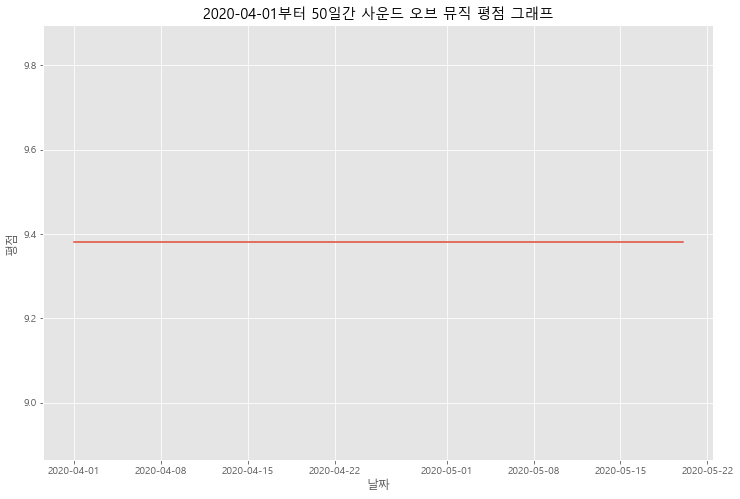

In [4]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic') # 한글 넣기 위해 폰트 설정
plt.rcParams['axes.unicode_minus']=False
plt.style.use("ggplot")

plt.figure(figsize=(12,8))
plt.title('2020-04-01부터 50일간 사운드 오브 뮤직 평점 그래프')
plt.plot(search_movie['date'],search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()

### 일별은 생각보다 변화가 많이 없어서 월별로 확인

In [5]:
date_list = pd.date_range(start='2010-01-01',end='2020-09-01',freq='M')
date_list

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', length=128, freq='M')

In [ ]:
movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'})
    points = soup.find_all('td',{'class':'point'})
    
    titles_text = []
    points_text = []
    date = []
    
    for t,p in zip(titles,points):   # 길이가 같아 zip으로 한번에 처리 가능
        titles_text.append(t.text.strip('\n'))
        points_text.append(float(p.text))
        date.append(today)
        
    
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

In [ ]:
frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})

expr = "title == '살인의 추억'"
search_movie = frame.query(expr)
print(search_movie)

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic') # 한글 넣기 위해 폰트 설정
plt.rcParams['axes.unicode_minus']=False
plt.style.use("ggplot")

plt.figure(figsize=(12,8))
plt.title('2010-01-01 부터 2020-08-31 까지의 살인의 추억 평점 그래프')
plt.plot(search_movie['date'],search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()